<a href="https://colab.research.google.com/github/jugernaut/Prometeo/blob/desarrollo/01_Calculo/05_Sucesiones/01_Sucesiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Sucesiones
##Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101019


*   Autores: 
    - José de Jesús Tapia López
    - Luis M. de la Cruz Salas

*   Rev: mar nov 11 13:33:12 CDT 2020

Este sitio puede ser usado libremente, tanto por profesores como por estudiantes, que deseen complementar sus cursos y conocimientos en los temas antes mencionados. Los materiales están bajo una Licencia Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />Esta obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Licencia Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>.

In [ ]:
# COLAB
#!git clone https://github.com/jugernaut/Prometeo.gitb #rama  master
!git clone --branch desarrollo https://github.com/jugernaut/Prometeo.git #rama desarrollo 
import Prometeo.Utils.gutils as vis

# Linux, MacOS y windows
#import os, sys
#sys.path.insert(0, os.path.abspath('../../'))
#import Utils.gutils as vis

from sympy import limit, Symbol, oo
import math
import numpy as np
%matplotlib inline

Cloning into 'Prometeo'...
remote: Enumerating objects: 147, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 1842 (delta 85), reused 13 (delta 8), pack-reused 1695
Receiving objects: 100% (1842/1842), 13.56 MiB | 27.33 MiB/s, done.
Resolving deltas: 100% (1157/1157), done.


## Introducción

En muchas situaciones cotidianas aparecen secuencias o listas de diversos
objetos o personas. En particular, seguramente habrás presentado exámenes
o pruebas psicométricas y encontrado listas de números como estas:

$2,5,8,11,14,...$

$\frac{1}{2}, \frac{2}{3}, \frac{3}{4}, \frac{4}{5}, \frac{5}{6}$

$1,4,9,16, 25$

Para cada una de las listas anteriores puedes determinar el número que aparece en cualquier lugar de la secuencia (por ejemplo, el número que ocupa la posición $12,020$). Para estas sucesiones numéricas, se acostumbra a resumir esta información de la siguiente manera: el lugar del número se representa mediante una letra, por lo general la letra $n$, de modo que:

* Dada la lista $2,5,8,11,14, \dots$ en el lugar $n$ debe aparecer el elemento $3n-1$.
* La lista $1,4,9,16, 25, \dots$ puede escribirse como $1^2, 2^2, 3^2, 4^2, 5^2, \dots$, por lo que que en el lugar $n$ debe aparecer el número $n^2$.

La manera de determinar el número que debe aparecer en cada lugar de
la lista se llama también la regla de correspondencia de la lista. 

A continuación presentamos las respectivas reglas de correspondencias de las listas anteriores:

In [ ]:
# creamos una expresión conocida como función lambda, que representa a la sucesión 3n-1 
sucesion1 = lambda n: 3*n-1
# creamos una expresión conocida como función lambda, que representa a la sucesión n^2 
sucesion2 = lambda n: n**2

# Le pedimos al usuario que introduzca un número natural, el cual va a ser la entrada
# de las funciones lambda que acabamos de crear
num = int(input("Introduzca un número natural: "))

# imprimos el valor que introdujo el usuario valuado en la sucesión 3n+1
print("El lugar " +str(num)+ " de la primera lista (3n+1) es ocupado por el número: ", sucesion1(num))
# imprimos el valor que introdujo el usuario valuado en la sucesión n^2
print(r"El lugar " +str(num)+ " de la segunda lista (n^2) es ocupado por el número: ", sucesion2(num))

Introduzca un número natural: 17
El lugar 17 de la primera lista (3n+1) es ocupado por el número:  50
El lugar 17 de la segunda lista (n^2) es ocupado por el número:  289


Hasta ahora hemos considerado secuencias de números ordenados de acuerdo con los números naturales: listas con un primer elemento (que podemos asociar al 1), un segundo elemento (asociado al 2), y así sucesivamente.
De esta manera, dado un conjunto $A$, formamos una lista asociando elementos de $A$ a los números naturales en $\mathbb{N}$. Esto nos conduce a la siguiente definición.

Una **sucesión** de elementos en $A$ es una función que a cada
número natural le asocia un elemento de $A$. 

Una **sucesión numérica** es una función cuyo dominio es el
conjunto de los números naturales y cuyo contradominio es el conjunto de
los números reales. Así, una sucesión de este tipo es una función que a cada número natural le hace corresponder uno y sólo un número real.

Las siguientes listas se pueden describir mediante funciones. Por ejemplo:

* La lista $1, 2, 3, 4, 5, \dots $ se puede describir como la función que a cada número natural le asocia el mismo natural. En este caso, la función $f$ sería de la forma $f(n)=n$.
* La lista $1, 1 + 2, 1 + 2 + 2^2 , 1 + 2 + 2^2 + 2^3 , \dots, 1 + 2 + 2^2 + 2^3 + \dots + 2^n-1 , \dots$. En este caso, la función $f$ se podría describir  como la función que a cada número natural $n$ le
asocia el número $1 + 2 + 2^2 + 2^3 + \dots + 2^n-1$, es decir, $f(n)=1 + 2 + 2^2 + 2^3 + \dots + 2^n-1$.

Se acostumbra a describir la sucesión mediante los elementos de su imagen
ordenados, llamando a estos los términos de la sucesión, escritos mediante letras con subı́ndices $a_1, a_2, a_3, \dots, a_n , \dots$ . Esto significa que al número 1 le corresponde $a_1$, que es la imagen del natural 1 bajo la función y el primer elemento de la sucesión; al 2 le corresponde el segundo elemento $a_2$; al 3 le corresponde el tercer elemento $a_3$ , y ası́ sucesivamente; por lo cual se tiene que al número
natural $n$ le corresponde el $n$-ésimo elemento $a_n$. De esta manera escribimos la sucesión como la lista ordenada de números reales $a_1 , a_2 , a_3 , \dots , a_n , \dots$

Notemos que una sucesión tiene una infinidad de términos: Como una sucesión es una función que tiene como dominio un conjunto infinito (los naturales), también tiene un número infinito de imágenes. Generalmente escribiremos de manera abreviada $\{a_n\}_{n=1}^\infty$, en lugar de la lista $a_1, a_2 , a_3 , \dots , a_n , \dots $, o bien solamente ${a_n}$ entendiendo que $n \in \mathbb{N}$ y que $a_n$ es el término general de la sucesión.

### Ejemplo 1

1. La sucesión $\frac{1}{2}, \frac{4}{3}, \frac{9}{4}, ..., \frac{n^2}{n+1}$ tiene como regla de correspondencia que al número natural $n$ se le asigna el número real $\frac{n^2}{n+1}$. Así, el término 171 de la sucesión es $\frac{171^2}{171+1}=\frac{29241}{172}$.

In [ ]:
# biblioteca para expresar valores como fracciones
from fractions import Fraction

# creamos una expresión conocida como función lambda, que representa a la sucesión n^2/(n+1) 
s1 = lambda n: Fraction(n**2, (n+1))
# imprimos el término 171 de la sucesión
print(s1(171))

29241/172


### Ejemplo 2

En la sucesión $\pi, \pi, \pi, ..., \pi, . . .$, a cada natural $n$ se le asigna el número real $\pi$. Este tipo de sucesión se llama **sucesión constante**, porque todos los términos son iguales. 

### Ejemplo 3

La sucesión $1, 1, 2, 1, 2, 3, 1, 2, 3, 4, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 6, . . .$ no está dada por una fórmula, sino por un procedimiento. Primero escribimos el primer número natural, en seguida los dos primeros naturales, después los tres primeros naturales y ası́ sucesivamente.

Para saber cuál es el número que ocupa una cierta posición, por ejemplo la 16, podemos fijarnos en el quinto número triangular, el 15 y por lo tanto afirmar que en la posición 16 hay un 1. ¿Cómo se justifica
este procedimiento? ¿Puede crear un programa que imprima esta sucesión?

## Operaciones con sucesiones
Sean $\{a_n\}$ y $\{b_n\}$ dos sucesiones.
1. La **suma** de sucesiones es una nueva sucesión cuyo término general está dado por la suma de los términos generales de cada una de las sucesiones. Esto es: $\{a_n\} + \{b_n\} = \{a_n + b_n \}$.

2. La **resta** de sucesiones es una nueva sucesión cuyo término general está dado por la resta de los términos generales de cada una de las sucesiones. Esto es: $\{a_n\} - \{b_n\} = \{a_n - b_n \}$.

3. El **producto** de sucesiones es una nueva sucesión cuyo término general está dado por el producto de los términos generales de cada una de las sucesiones. Esto es: $\{a_n\} \cdot \{b_n\} = \{a_n \cdot b_n \}$.

4. Definimos la **división** de sucesiones como una nueva sucesión cuyo
término general es el cociente de los términos generales de las dos sucesiones originales, siempre y cuando la sucesión que aparece en el
denominador nunca tome el valor cero. Esto es: $\frac{\{a_n\}}{\{b_n\}} = \{\frac{a_n}{b_n}\}$, con $b_n \neq 0$ para toda $n \in \mathbb{N}$.

5. La multiplicación de una sucesión por un escalar es una nueva sucesión, cuyo término general se obtiene multiplicando el número dado por el término general de la sucesión original; esto es, si $\lambda \in \mathbb{R}$, entonces $\lambda\{a_n\} = \{\lambda a_n\}$.

## Convergencia de una sucesión

Decimos que la sucesión $\{a_n\}$ converge a un número real $a$ si y sólo si para toda $ \epsilon > 0$ existe un número natural $N$ tal que si $n > N$ entonces $|a_n - a| < \epsilon$. Si la sucesión $\{a_n\}$ converge a $a$, decimos que el límite de la sucesión $\{a_n\}$ es $a$ y escribimos $\lim_{n \to \infty} a_n = a$

Esta definición nos dice que dado cualquier número positivo $\epsilon$, podemos encontrar un número natural $N$, que depende de $\epsilon$, tal que si nos fijamos en los índices mayores que $N$ (es decir, $N + 1, N + 2, \dots , N + k, . . .)$, entonces los términos de la sucesión
$a_{N +1}, a_{N +2} ,  \dots , a_{N +k}, \dots.$ distan de $a$ menos que $\epsilon$.

Además, sabemos que: $|a_n - a| < \epsilon \Leftrightarrow - \epsilon < a_n - a < \epsilon \Leftrightarrow a - \epsilon < a_n < a + \epsilon$,

entonces la definición de convergencia implica que todos los elementos de la sucesión cuyos índices sean mayores que $N$ están en el intervalo abierto $(a - \epsilon, a + \epsilon)$ y solamente un número finito se encuentra fuera de él.

<img src="https://github.com/jugernaut/Prometeo/blob/desarrollo/Figuras/sucesion.png?raw=1" width="500">
<caption><center><font color='blue'> 
Imagen tomada de Briseño, L. et al., Una mirada al cálculo a través de las sucesiones, segunda edición, 2015.</center></caption>



### Ejemplo 4

La sucesión $\frac{1}{n}$ converge a cero, esto es, $\lim_{n \to \infty} \frac{1}{n} = 0$

Tomemos distintos valores de $\epsilon$ y encontremos el valor de $N$. Para esto, primero debemos resolver la siguiente desigualdad:

$\displaystyle \big|\frac{1}{n}-0\big| = \frac{1}{n}< \epsilon \Leftrightarrow n > \frac{1}{\epsilon}$.

Proponemos $\displaystyle N = \lfloor {\frac{1}{\epsilon}} \rfloor + 1$. Así, si $\epsilon = 0.3$, entonces $N =\lfloor {\frac{1}{0.3}} \rfloor + 1 = 4$

Veamos el comportamiento de $N$ al variar $\epsilon$:

| $\epsilon$ | n |  Así, si  | entonces $\frac{1}{n}$ es menor que: | 
|---|---|----|---|
| 0.3 | 4 |n > 4| 0.3 | 
| 0.15 | 7 |n > 7| 0.15 |
| 0.1 | 10 |n > 10| 0.1 | 
| 0.025 | 41 |n > 41| 0.025 |
| 0.01 | 100 |n > 100| 0.01 | 
| 0.001 | 1000 |n > 1000| 0.001 |
| 0.00001 | 100000 |n > 100000| 0.00001 | 

**Observaciones**:

- En el primer renglón de la tabla observamos que la condición $\frac{1}{n}< \epsilon $ se cumple para $\epsilon = 0.3$ y $N \geq 4$, por lo tanto, los términos de la sucesión que cumplen la condición son:  $\frac{1}{4},\frac{1}{5},\frac{1}{6}, \dots$ Esto significa que esos términos distan del valor $0$ menos que $0.3$.

- A partir de la tabla ¿podrías decir qué términos distan del valor $0$ menos que $0.025$?

- ¿Cuáles son los índices tales que los términos correspondientes de la
sucesión cumplen la desigualdad $|\frac{1}{n}-0| < 0.0001$?

Ahora completaremos la demostración de que la sucesión $\{\frac{1}{n}\}$ converge a 0.

Ya hemos visto que $N = \lfloor \frac{1}{\epsilon} \rfloor +1$. Ahora tomemos $n > \lfloor \frac{1}{\epsilon} \rfloor +1$. Como $\lfloor \frac{1}{\epsilon} \rfloor +1 > \frac{1}{\epsilon}$, entonces $n>\frac{1}{\epsilon} \Leftrightarrow \epsilon > \frac{1}{n}$, y esto implica que $\frac{1}{n} = |\frac{1}{n}-0| < \epsilon$.

Por lo tanto: $\displaystyle \lim_{n \to \infty} \frac{1}{n} = 0$.

En la siguiente gráfica podemos observar que efectivamente ocurre esto:


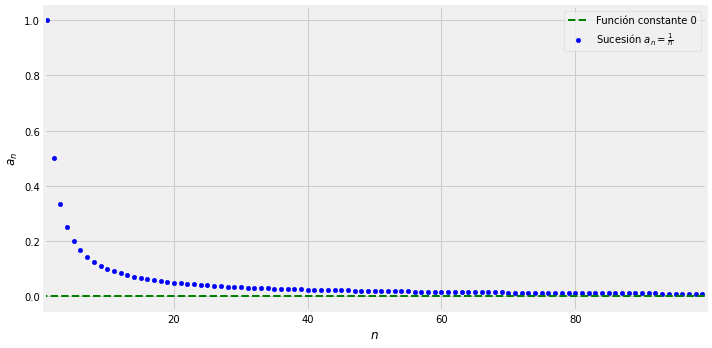

In [ ]:
# Creamos un rango de valores dentro del intervalo semiabierto [0, 100), 
# que va del 1 al 100 con pasos de 1
num_suc = np.arange(1,100)
# Valuamos los elementos del rango anterior en la sucesión {1/n}
sucesion2 = [1/i for i in num_suc]

# parámetros que contendrá la próxima figura que vamos a crear y mostrar: 
# la etiqueta del eje x, la etiqueta del eje y, los límites del eje x
par = [{'xlabel':'$n$',
        'ylabel':'$a_n$',
       'xlim':(0.5,99.5)},
       ]
# instanciamos una figura que básicamente es el plano cartesiano
graf = vis.planoCartesiano(par=par)
# graficamos (gráfica de puntos) en la figura la sucesión {1/n} en el intervalo semiabierto 
# que creamos: [1, 100) con pasos de 1
graf.scatter(x = num_suc, y = sucesion2, 
             par={'s':20,'color':'blue', 'label':r'Sucesión $a_n=\frac{1}{n}$'})
# graficamos en la figura una línea verde, punteada y horizontal en y = 0
graf.plot(x=[0,100],y=[0,0], par={'c':'green','linestyle':'--', 'lw':2,'label':'Función constante 0'})
# indicamos que queremos mostrar en la figura la leyenda de las dos gráficas
graf.legend()
# mostramos la figura que contiene la gráfica de la sucesión y la recta vertical
graf.show()

**Proposición** Sean $\{a_n\}$, $\{b_n\}$dos sucesiones.

1. Si la sucesión $\{a_n\}$ converge, su límite es único.
2. Supongamos que $\{a_n\}$ y $\{b_n\}$ convergen a $a$ y $b$, respectivamente. Entonces:

  a) La sucesión $\{a_n \pm b_n\}$ converge a $a \pm b$. Es decir,
      $\displaystyle \lim_{n \to \infty} (a_n \pm b_n) = \lim_{n \to \infty} a_n \pm \lim_{n \to \infty} b_n = a \pm b$.

  b)  La sucesión $\{a_n \cdot b_n\}$ converge a $a \cdot b$. Es decir,
      $\displaystyle \lim_{n \to \infty} (a_n \cdot b_n) = \lim_{n \to \infty} a_n \cdot \lim_{n \to \infty} b_n = a \cdot b$.

  c) Si además suponemos que $b \neq 0$ , la sucesión $\displaystyle \frac{\{a_n\}}{\{b_n\}}$ converge a $\displaystyle \frac{a}{b}$. Es decir,
      $\displaystyle \lim_{n \to \infty} \frac{\{a_n\}}{\{b_n\}} = \frac{\displaystyle \lim_{n \to \infty} a_n}{\displaystyle \lim_{n \to \infty} b_n} = \frac{a}{b}$.

  d) Para $\lambda \in \mathbb{R}$, la sucesión $\{\lambda \cdot a_n\}$ converge a $\lambda \cdot a$. Es decir, $\displaystyle \lim_{n \to \infty} (\lambda \cdot a_n) =  \lambda \cdot \lim_{n \to \infty} a_n = \lambda \cdot a $.

Notemos que la definición de sucesión es tan parecida a la definición de límite. Es posible definir el primero en términos del segundo y viceversa.

**Teorema** Sea $f$ una función definida en un intervalo abierto que contiene $c$, excepto quizá en $c$ mismo, con $\displaystyle \lim_{x \to c} f(x) = l$. Supongamos que $\{a_n\}$  es una sucesión que satisface:

1. cada $a_n$ pertenece al dominio de $f$.
2. cada $ a_n \neq c$.
3. $\displaystyle \lim_{n \to \infty } a_n = c$.

Entonces la sucesión $\{f(a_n)\}$ satisface: $\displaystyle \lim_{n \to \infty } f(a_n) = l$

### Ejemplo 5

Sea $\{a_n\}$ la sucesión definida por] $\displaystyle a_n = \sin\left(\cos \left(e + \frac{n-1}{n+1}\right)\right)$. Usando límites de funciones, se puede mostrar que esta sucesión converge a $ \sin(\cos(e +1))$. Veamos esto gráficamente.

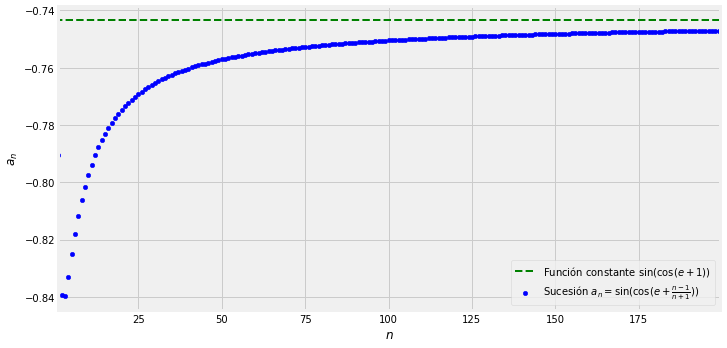

In [ ]:
# creamos una expresión conocida como función lambda, que representa a la sucesión 
# {sin(cos(e + (n-1)/(n+1)))}
an = lambda n: np.sin(np.cos(np.exp(1) + (n-1)/(n+1)))

# creamos un rango de valores dentro del intervalo semiabierto [1, 200), 
# que va del 1 al 200 con pasos de 1
n = np.arange(1,200)

# Valuamos los elementos del rango anterior en la sucesión {sin(cos(e + (n-1)/(n+1)))}
s5 = [an(i) for i in n]

# creamos la constante a la que converge la sucesión: sin(cos(e+1))
cte = np.sin(np.cos(np.exp(1)+ 1)) 

# parámetros que contendrá la próxima figura que vamos a crear y mostrar: 
# la etiqueta del eje x, la etiqueta del eje y, los límites del eje x
par = [{'xlabel':'$n$',
        'ylabel':'$a_n$',
       'xlim':(1,199.5)},
       ]

# instanciamos una figura que básicamente es el plano cartesiano
graf = vis.planoCartesiano(par=par)
# graficamos (gráfica de puntos) en la figura la sucesión {sin(cos(e + (n-1)/(n+1)))} 
# en el intervalo semiabierto  que creamos: [1, 200) con pasos de 1
graf.scatter(x=n,y=s5, 
             par={'s':20, 'c':'blue', 'label':r'Sucesión $a_n = \sin(\cos(e + \frac{n-1}{n+1}))$'})
# graficamos en la figura una línea verde, punteada y horizontal en y = sin(cos(e+1))
graf.plot(x=[0,200],y=[cte,cte], 
          par={'c':'green','ls':'--', 'lw':2.0,'label':'Función constante $\sin(\cos(e+1))$'})
# indicamos que queremos mostrar en la figura la leyenda de las dos gráficas
graf.legend()
# mostramos la figura que contiene la gráfica de la sucesión y la recta vertical
graf.show()

Una sucesión $\{a_n\}$ es:

* **creciente** si $a_{n+1} > a_n$ para todo $n$.
* **no decreciente** si $a_{n+1} \ge a_n$ para todo $n$.
* **decreciente** si $a_{n+1} < a_n$ para todo $n$.
* **no creciente** si $a_{n+1} \le a_n$ para todo $n$.

Y está **acotada superiormente**  si existe un número $M$ tal que $ a_n \le M$  para todo $n$.
(Correspondientemente se dice que está **acotada inferiormente**  si $a_n \ge M$).

### Ejemplo 6

Consideremos la sucesión $\sqrt{2},\sqrt{2+\sqrt{2}},\sqrt{2+\sqrt{2+\sqrt{2}}}, \sqrt{2+\sqrt{2+\sqrt{2+ \dots}}}, \dots $

Esta sucesión se puede escribir de la siguiente manera: 

si $a_1 = \sqrt{2}$ entonces, $a_2 = \sqrt{2 + a_1}, a_3 =\sqrt{2 + a_2}, ..., a_{n+1} = \sqrt{2 + a_n}$.

Para ver que esta sucesión es creciente, podemos usar el principio de
inducción:

- Definamos el conjunto $A= \{n \in \mathbb{N}^+ | \quad a_{n+1} > a_n \}$.
- Observamos que $a_1 = \sqrt{2}$ y $a_{1+1} = \sqrt{2+\sqrt{2}}$, de donde obtenemos que $a_2 > a_1$. Por lo tanto $1 \in A$.
- Supongamos que $m-1 \in A$, es decir, supongamos que se cumple que $a_{m} > a_{m-1}$. 
- Debemos demostrar que $m \in A$, es decir, que $a_{m+1} > a_{m}$: 
    - Notemos que $a^2_{m+1} - a^2_m = (2 + a_m) - (2 + a_{m-1}) = a_m - a_{m-1}$. Como por hipótesis de inducción $a_{m} > a_{m-1}$, entonces $a^2_{m+1} > a^2_m$; y como los términos de la sucesión son positivos, tenemos que $a_{m+1} > a_m$. Por lo tanto $m \in A$.
- Se puede ver que $A = \mathbb{N}$. Por lo tanto $a_{n+1} > a_n$ para todo $n \in \mathbb{N}$.
- Lo cual quiere decir que la sucesión $a_n$ es creciente.

Además, podemos ver a donde converge la sucesión realizando lo siguiente:

- Sea $x = \sqrt{2+\sqrt{2+\sqrt{2 +\cdots}}}$. 
- Entonces $x^2 = 2+\sqrt{2+\sqrt{2+ \cdots}}$.
- Por lo que $x^2 - x = 2$. Esta última ecuación tiene como solución: $x_1 = -1$, $x_2 = 2$. Como $x$ es una raíz positiva, la solución a la ecuación tiene que ser $x=2$, lo cual quiere decir que esta sucesión converge a $2$.

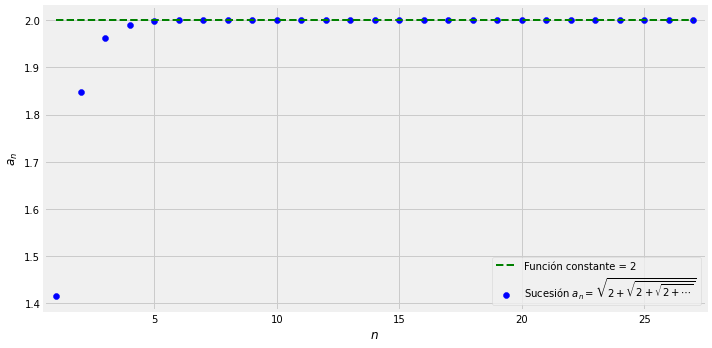

In [ ]:
# creamos una función recursiva, es decir, que se llama a sí misma durante su propia ejecución. 
def sucRec(n):
  # cuando la función recibe un uno, regresa un 2
    if n == 1:
        return np.sqrt(2)
  # cuando la función recibe un número mayor a 1, calculamos la raíz cuadrada de la suma 
  # de 2 con sucRec(n-1), es decir, volvemos a llamar a esta función pero con el
  # número anterior al que fue dado, y esta condición va a seguir ejecutándose hasta
  # que lleguemos a n=1. Esto nos permite realizar la suma sqrt(2+sqrt(2+(sqrt(2+...))))
    else:
        return np.sqrt(2 + sucRec(n-1))

# creamos un rango de valores dentro del intervalo semiabierto [1, 28), 
# que va del 1 al 28 con pasos de 1
n = np.arange(1,28)
# Valuamos los elementos del rango anterior en la sucesión sqrt(2+sqrt(2+(sqrt(2+...))))
s6 = [sucRec(num) for num in n]

# parámetros que contendrá la próxima figura que vamos a crear y mostrar: 
# la etiqueta del eje x, la etiqueta del eje y, los límites del eje x
par = [{'xlabel':'$n$',
        'ylabel':'$a_n$',
       'xlim':(0.5,27.5)},
       ]
# instanciamos una figura que básicamente es el plano cartesiano
graf = vis.planoCartesiano(par=par)
# graficamos (gráfica de puntos) en la figura la sucesión sqrt(2+sqrt(2+(sqrt(2+...))))
# en el intervalo semiabierto  que creamos: [1, 28) con pasos de 1
graf.scatter(x=n,y=s6, 
             par={'c':'blue','label':r'Sucesión $a_n = \sqrt{2+\sqrt{2+\sqrt{2 +\cdots}}}$'})
# graficamos en la figura una línea verde, punteada y horizontal en y = 2
graf.plot(x=[1,27],y=[2,2], par={'c':'green','ls':'--','lw':2,'label':r'Función constante = 2'})
# indicamos que queremos mostrar en la figura la leyenda de las dos gráficas
graf.legend()
# mostramos la figura que contiene la gráfica de la sucesión y la recta vertical
graf.show()

**Teorema** 
1. Si $\{a_n\}$ es una sucesión no decreciente y acotada superiormente, entonces $\{a_n\}$ converge.

2. Si $\{a_n\}$ es una sucesión no creciente y acotada inferiormente, entonces $\{a_n\}$ converge.



Una **subsucesión** de una sucesión $\{a_n\}$ es una sucesión de la forma $a_{n_{1}}, a_{n_{2}}, a_{n_{3}},...$ donde $n_j \in \mathbb{N}$ para toda $j \in \mathbb{N}$ satisface que $n_i < n_j$, con $i \neq j$.


**Lema** Cualquier sucesión $\{a_n\}$ contiene una subsucesión que es o bien no decreciente o bien no creciente.

**Corolario (Teorema de Bolzano-Weiertrass)** Toda sucesión acotada tiene una subsucesión convergente.

### Ejemplo 7

Consideremos la sucesión $a_n = \{(-1)^n\}$. No es dificil comprobar que esta sucesión no converge. Además, notemos que esta sucesión está acotada, y debido al corolario anterior esto nos dice que tiene una subsucesión convergente.

Si consideramos la subsucesión $\{(-1)^{2k}\}$ se puede comprobar que $\displaystyle \lim_{n \to \infty} (-1)^{2k} = 1$. Más aún, si consideremos la subsucesión $\{(-1)^{2k-1}\}$ se puede comprobar que $\displaystyle \lim_{n \to \infty} (-1)^{2k} = -1$. 

Esto quiere decir que, aunque una sucesión no converja, podemos encontrar subsucesiones que sí, siempre y cuando la sucesión esté acotada.


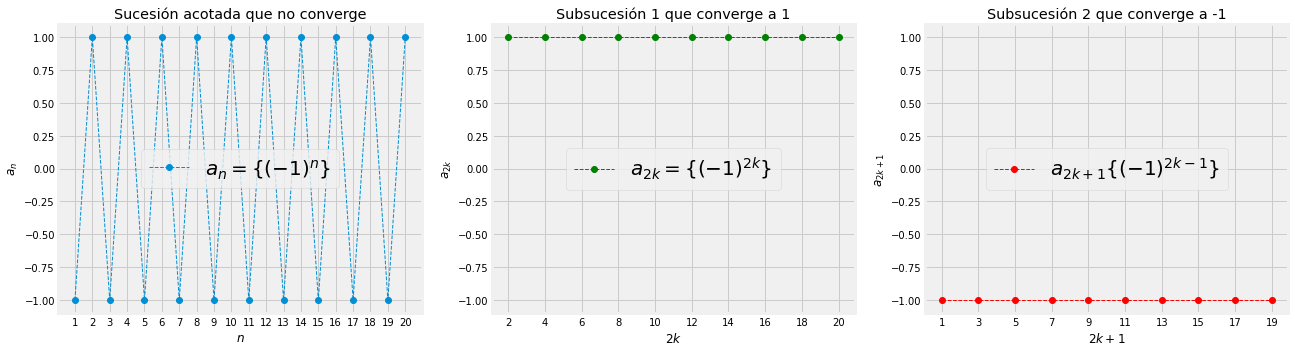

In [ ]:
# creamos una expresión conocida como función lambda, que representa a la sucesión {(-1)^n}
s7 = lambda n: (-1)**n
# creamos un rango de valores dentro del intervalo semiabierto [1, 21), 
# que va del 1 al 21 con pasos de 1 (números del 1 al 20)
num = np.arange(1,21)
# creamos un rango de valores dentro del intervalo semiabierto [2, 22), 
# que va del 2 al 22 con pasos de 2 (números pares del 2 al 20)
pares = np.arange(2,22,2)
# creamos un rango de valores dentro del intervalo semiabierto [1, 21), 
# que va del 1 al 21 con pasos de 2 (números impares del 1 al 19)
impares = np.arange(1,21,2)

# valuamos los números en la sucesión {(-1)^n}
sucesion = [s7(i) for i in num]
# valuamos los números pares en la sucesión {(-1)^n}
subsucesion1 = [s7(i) for i in pares]
# valuamos los números impares en la sucesión {(-1)^n}
subsucesion2 = [s7(i) for i in impares]

# parámetros que contendrá la próxima figura que vamos a crear y mostrar: 
# los tres títulos, la etiqueta de los tres ejes x y la etiqueta de los tres ejes y
par = [{'title':'Sucesión acotada que no converge', 
        'xlabel':'$n$',
        'ylabel':'$a_n$'},
       {'title':'Subsucesión 1 que converge a 1', 
        'xlabel':'$2k$',
        'ylabel':'$a_{2k}$',
        'ylim':(-1.1,1.1)}, 
       {'title':'Subsucesión 2 que converge a -1',
        'xlabel':'$2k+1$',
        'ylabel':'$a_{2k+1}$',
       'ylim':(-1.1,1.1)}
      ]

# parámetro que contendrá la próxima figura: tamaño de (18,5)
par_fig= {'figsize':(18,5)}

# instanciamos una figura que contiene horizontalmente tres planos cartesianos
graf = vis.planoCartesiano(1,3,par=par,par_fig=par_fig)

# graficamos en el primer plano de la figura  la sucesión valuada con los números 
# que van del 1 al 20
graf.plot(1, x = num, y = sucesion, 
             par={'marker':'o', 'ls':'--', 'lw':1.0, 'label':r'$a_n = \{(-1)^n\}$'})
# graficamos en el segundo plano de la figura la sucesión valuada con los números 
# pares que van del 2 al 20
graf.plot(2, x = pares, y = subsucesion1,
             par={'marker':'o', 'ls':'--', 'lw':1.0, 'label':r'$a_{2k} = \{(-1)^{2k}\}$','color': 'green'})
# graficamos en el tercer plano de la figura la sucesión valuada con los números
# impares que van del 1 al 19
graf.plot(3, x = impares, y = subsucesion2,
             par={'marker':'o', 'ls':'--', 'lw':1.0, 'label':r'$a_{2k+1} \{(-1)^{2k-1}\}$','color':'red'})
# las etiquetas del eje x del primer plano van a ser los números que van del 1 al 20
graf.ticks(n = 1, xticks = num)
# las etiquetas del eje x del segundo plano van a ser los números pares que van del 2 al 20
graf.ticks(n = 2, xticks = pares)
# las etiquetas del eje x del tercer plano van a ser los números impares que van del 1 al 19
graf.ticks(n = 3, xticks = impares)
# indicamos que la leyenda en cada plano se ubique en el centro
graf.legend(par={'loc':'center', 'fontsize':20})
# mostramos la figura que contiene las gráficas de las sucesiones en cada plano 
graf.show()

**Proposición** Si una sucesión $\{a_n\}$ es convergente a un número $a$, entonces cualquiera de sus subsucesiones es convergente, y converge al mismo número $a$.


**Proposición** Sean $\{a_n\}, \{b_n\}, \{c_n\}$ tres sucesiones tales que $a_n \le b_n \le c_n$, y $\lim_{n \to \infty} a_n = \lim_{n \to \infty} c_n = a$. Entonces la sucesión $ \{b_n\}$ converge y $\lim_{n \to \infty} b_n = a$

Uno de los comportamientos que puede observarse en los términos de una sucesión es el de irse acercando entre
sí. A continuación se precisará este concepto, que será útil para mostrar la convergencia de una sucesión en los casos en que no se puede establecer de
antemano cuál es el número al cual tienden los términos de la misma.

Los términos de una sucesión $\{a_n\}$ "se acercan entre sí", cuando todos los términos $a_n, a_m$ están muy próximos entre sí, cuando se consideran valores de $n, m$ cada vez más grandes.

Una sucesión $\{a_n\}$ es una **sucesión de Cauchy**
si para cada $\epsilon > 0$ existe $N$ tal que, para cualquiera dos números $n$, $m$, si se cumple que $n, m > N$, entonces $|a_n - a_m | < \epsilon$.

**Teorema** Una sucesión $\{a_n\}$ converge si y sólo si es una sucesión de Cauchy.

### Ejemplo 8

Veamos que la sucesión $\{\frac{1}{n}\}$ es una sucesión de Cauchy. 

Se debe demostrar que para todo $\epsilon > 0$ existe un $N \in \mathbb{N}$ tal que para todo $n, m > N$, $|X_n - X_m| < \epsilon$.

Sea $ \epsilon > 0$. Por la propiedad arquimediana podemos escoger un número natural $N > \frac{2}{\epsilon}$. Luego, para todo $n, m >N$:

$\displaystyle \Big|\frac{1}{n} - \frac{1}{m}\Big| \le \Big|\frac{1}{n}\Big| + \Big|\frac{1}{m}\Big| = \frac{1}{n} + \frac{1}{m}$ $...(1)$

Como $n,m > N$, entonces $\displaystyle \frac{1}{n} < \frac{1}{N}$ y $\displaystyle \frac{1}{m} < \frac{1}{N}$. Así, de $(1)$ obtenemos que $\displaystyle \frac{1}{n} + \frac{1}{m} < \frac{1}{N} + \frac{1}{N} < \frac{\epsilon}{2} + \frac{\epsilon}{2} = \epsilon$, que es lo que se quería demostrar.



### Ejemplo 9 

Una población de humanos tiene una cierta cantidad de personas contagiadas por el coronavirus y el número de personas contagiadas está creciendo de tal manera que cada día hay $1.075$ veces más contagios que el día anterior. Supongamos que hay $500$ personas contagiadas en el primer día,  ¿cuántas personas contagiadas habrá en la séptimo día?

La población se puede escribir como una secuencia geométrica con $a_1$ como el total de personas contagiadas en el día 1, $a_2$ como el total de personas contagiadas en el día 2, y así sucesivamente. Podemos usar la siguiente fórmula que representa el número de personas contagiadas en el $n$-ésimo día:

 $a_n = a_1\cdot r^{n-1}$, con $r = 1.075$ y $a_1 =  500$, es decir;

 $a_n = 500\cdot 1.075 ^{n-1}$


 Entonces el total de personas contagiadas en el día 7 está dado por:

 $a_7 = 500\cdot 1.075 ^{7-1} = 500\cdot 1.075 ^{6} = 771.65 \approx 772.$

 Por lo tanto, habrá 772 personas contagiadas en el séptimo día.
 
 Además, podemos ver el comportamiento del número de personas contagiadas en los primeros 20 días mediante la siguiente gráfica:


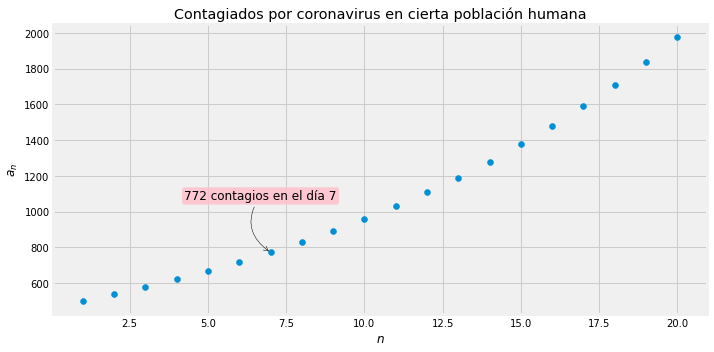

In [ ]:
# creamos un rango de valores dentro del intervalo semiabierto [1, 21), 
# que va del 1 al 21 con pasos de 11
n = np.arange(1,21,1)
# Valuamos los elementos del rango anterior en la sucesión {500x1.075^(n-1)}
a_n = [round(500*1.075**(j-1)) for j in n]

# parámetros que contendrá la próxima figura que vamos a crear y mostrar: 
# el título, la etiqueta del eje x y la etiqueta del eje y
par = [{'title':'Contagiados por coronavirus en cierta población humana',
        'xlabel':'$n$',
        'ylabel':'$a_n$'}
       ]

# instanciamos una figura que básicamente es el plano cartesiano
graf = vis.planoCartesiano(par=par)
# graficamos (gráfica de puntos) en la figura la sucesión {500x1.075^(n-1)} en el 
# intervalo semiabierto que creamos: [1, 21) con pasos de 1
graf.scatter(x=n,y=a_n)
# Hacemos algunas anotaciones el séptimo término de la sucesión
graf.annotate(par={'text':'772 contagios en el día 7', 'xy':(n[6], a_n[6]), 'xytext':(-10,50), 'fontsize':12,
            'textcoords':'offset points', 'ha':'center', 'va':'bottom',
            'bbox':{'boxstyle':'round','pad':0.2, 'fc':'pink', 'alpha':0.85},
            'arrowprops':{'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 
                           'color':'black'}})
# mostramos la figura que contiene dicha gráfica con las anotaciones realizadas
graf.show()

#Evalúa tus conocimientos

Si deseas contestar un breve cuestionario en el que podrás evaluar un poco del conocimiento aquirido en este notebook da clic [aquí.](https://forms.gle/j9uCCruZpK9TwL8i9)

## Referencias

* Spivak, M., & Marqués, B. F. (1988). Cálculo Infinitesimal. Reverté.
* Briseño, L., Palmas, Ó., & Verdugo, J. (2015). Una mirada al cálculo a través de las sucesiones. Prensas de Ciencias.
